<a href="https://colab.research.google.com/github/kamalzada/Machine-Learning-Projects/blob/master/gi_gl_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing useful libraries
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
df = pd.read_csv('GI_GL_corr (1).csv')

In [26]:
#Records that contain missing value(s)
df[df.isna().any(axis=1)] 

,product_name,glycemic_index(GI),glycemic_load


In [27]:
#If we ignore the missing values
df1 = df.dropna()

In [31]:
#Importing useful functions
%run Utility_tools.ipynb
reduce_memory_usage(df1)

Memory usage before: 0.05 MB
Memory usage now : 0.03 MB
Memory usage decreased by 37.5%


In [32]:
#Correlation coefficients
display (df1.corr(method='pearson'), 
         df1.corr(method='spearman'))

,glycemic_index(GI),glycemic_load
glycemic_index(GI),1.000000,0.637111
glycemic_load,0.637111,1.000000


,glycemic_index(GI),glycemic_load
glycemic_index(GI),1.000000,0.663845
glycemic_load,0.663845,1.000000


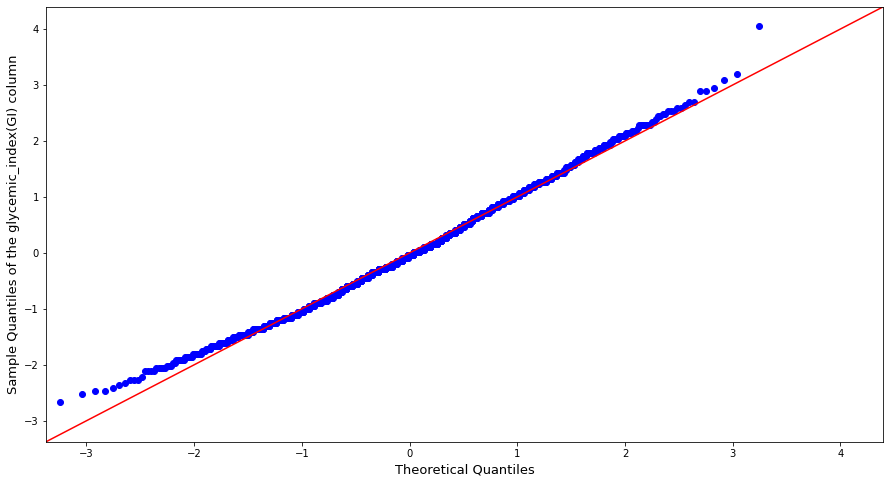

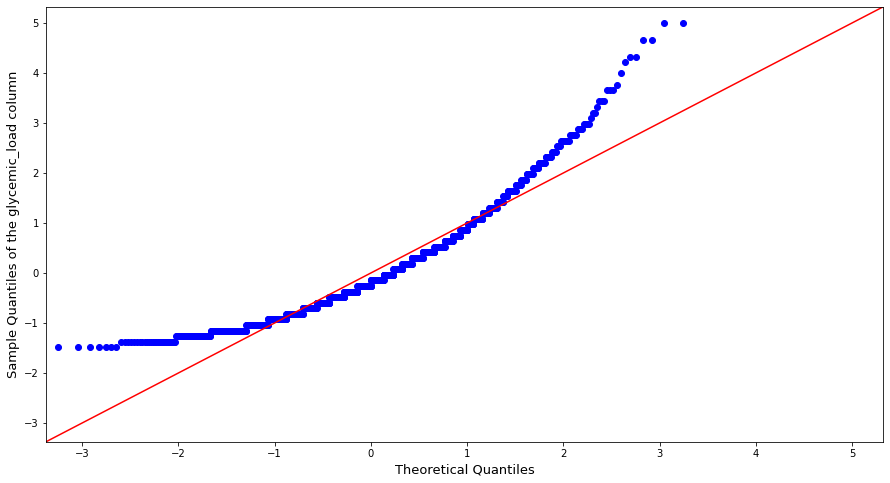

In [33]:
#Checking for normality (visual) 
for column in df1.columns[1:]: 
  fig = qqplot(df1[column], line = '45', fit=True)
  ax = plt.gca() 
  fig.set_size_inches(15, 8) 
  ax.set_xlabel('Theoretical Quantiles', fontsize=13)
  ax.set_ylabel(f'Sample Quantiles of the {column} column', fontsize=13)
plt.show()

In [34]:
#Normality check-Shapiro-Wilk test
from scipy.stats import shapiro
for column in df1.columns[1:]:
  print(f'''P-value for {column} column: {shapiro(df1[column])[1]}''') 

P-value for glycemic_index(GI) column: 6.483703600679291e-06
P-value for glycemic_load column: 4.006680958337093e-30


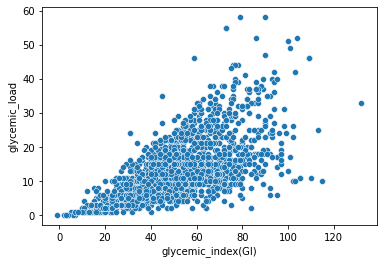

In [35]:
sns.scatterplot(x = 'glycemic_index(GI)', y = 'glycemic_load', data=df1) 
plt.show()